In [1]:
from sys import version_info 
print(version_info[:3]) 

(3, 9, 13)


### Python version: (3, 9, 13)

#### Problem 1

In [109]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [181]:
def num_int(f, a = None, b = None, n = None, *, part = None, method):
    if (n != None and (type(n) != int or int(n) <= 0)) or (part != None and part[1]-part[0] < 0):
        raise ValueError('n must be a positive integer')
    if (method == 'Simpson' and part != None):
        raise ValueError('Part is defined')
    if part != None and (a != None or b != None or n != None):
        raise ValueError('Input all interval values')
    if (method != 'left' and method != 'right' and method != 'midpoint'
        and method != 'trapezium' and method != 'Simpson'):
        raise NameError('Write the method correctly')
    if part == None and (a == None or b == None or n == None):
        raise ValueError('Input interval values')
    if part == None and a != None and b != None and n != None:
        part = []
        d = (b-a)/n
        i = 0
        while i <= n:
            part.append(a)
            a += d
            i += 1
    i = 0
    f_new = []
    if method == 'left':
        i = 1
        while i < len(part):
            c = f(part[i-1])*(part[i]-part[i-1])
            f_new.append(c)
            i += 1
        return sum(f_new)
    if method == 'right':
        i = 1
        while i < len(part):
            c = f(part[i])*(part[i]-part[i-1])
            f_new.append(c)
            i += 1
        return sum(f_new)
    if method == 'midpoint':
        i = 1
        while i < len(part):
            c = f((part[i-1]+part[i])/2)*(part[i]-part[i-1])
            f_new.append(c)
            i += 1
        return sum(f_new)
    if method == 'trapezium':
        i = 1
        while i < len(part):
            c = ((f(part[i-1])+f(part[i]))/2)*(part[i]-part[i-1])
            f_new.append(c)
            i += 1
        return sum(f_new)
    if method == 'Simpson' and n % 2 !=0:
        raise ValueError('The number of subintervals (n) is not even')
    if method == 'Simpson':
        i = 1
        while i < (len(part)/2):
            c = f(part[2*i-2]) + 4*f(part[2*i-1]) + f(part[2*i])
            f_new.append(c)
            i += 1
        return ((part[-1]-part[0])*sum(f_new))/(3*n)

f = lambda x: x**2 
num_int(f, 0, 1, 2, method='left')
num_int(f, 0, 1, 4, method='right')
num_int(f, part=[0, 0.5, 0.75, 1], method='midpoint') 
num_int(f, a=None, b=None, method='trapezium', part=[0, 0.5, 0.75, 1])
num_int(f, 0, 1, 8, method='Simpson')

0.125

0.46875

0.3203125

0.359375

0.3333333333333333

#### Problem 2

In [118]:
import csv
import matplotlib.pyplot as plt

def bs_eur_estimate_iv(ex_price, int_rate, cur_price, time, option_val,
                       option_type, *, lower_vol=0.0001, upper_vol=100):
    return root_bisection(lambda vol:
                          bs_eur(ex_price, int_rate, cur_price,
                                 time, vol, option_type) - option_val,
                          lower_vol, upper_vol)

def apply_iv (in_filename, out_filename, plot_filename = None, *,
              ex_price_field, option_val_field, iv_field, cur_price,
              int_rate, maturity_time, option_type):
    with open(in_filename, newline='') as file:
        header = file.readline()[:-1].split(',')
        try:
            if ex_price_field and option_val_field in header:
                ex_price_field_index = header.index(ex_price_field)
                option_val_field_index = header.index(option_val_field)
        except (ValueError, NameError, TypeError) as exception:
            print(f'{type(exception).__name__}: there are no fields with this names')
        if iv_field not in header:
                header.append(iv_field)
        else: 
            raise NameError('csv field of the implied volatility exists')
        data = [[x for x in line[:-1].split(',')] for line in file]
        for line in data:
            iv_field_data = bs_eur_estimate_iv(ex_price = float(line[ex_price_field_index]), 
                                               int_rate = int_rate, cur_price = cur_price, 
                                               time = maturity_time, option_val = float(line[option_val_field_index]),
                                               option_type = option_type)
            iv_field_data = round(iv_field_data*100, 3)
            line.append(iv_field_data)
        data[:0] = [header]
        
    with open(out_filename, 'w', newline='') as file:
        csv_writer = csv.writer(file)
        for row in data:
            csv_writer.writerow(row)
            
    if plot_filename != None:
        iv_field_data = []
        ex_price_data = []
        for row in data:
            ex_price_data.append(row[ex_price_field_index])
            iv_field_data.append(row[-1])
        iv_field_data = iv_field_data[1:]
        ex_price_data = [float(x) for x in ex_price_data[1:]]
        plt.plot(ex_price_data, iv_field_data, color = 'g')
        plt.xlabel('Exercise price')
        plt.ylabel('Implied volatility (%)')
        plt.title('Volatility Smile', fontsize = 15)
        plt.savefig(plot_filename)

##### Testing the function using AMF2_option_sample.csv file

[['Type', 'Strike', 'Moneyness', 'Price', 'Volume', 'Open Int', 'Implied_vol'], ['Call', '3600', '+9.32%', '407.2', '0', '3', 20.954], ['Call', '3625', '+8.69%', '384.9', '0', '0', 20.693], ['Call', '3650', '+8.06%', '363.1', '0', '0', 20.426], ['Call', '3675', '+7.43%', '341.5', '0', '4', 20.153], ['Call', '3680', '+7.31%', '337.3', '0', '0', 20.097], ['Call', '3690', '+7.05%', '328.9', '0', '0', 19.986], ['Call', '3700', '+6.80%', '320.3', '0', '10', 19.874], ['Call', '3710', '+6.55%', '312', '0', '0', 19.762], ['Call', '3720', '+6.30%', '303.7', '0', '0', 19.648], ['Call', '3725', '+6.17%', '299.6', '0', '0', 19.591], ['Call', '3730', '+6.05%', '295.5', '40', '0', 19.534], ['Call', '3740', '+5.79%', '287.3', '0', '0', 19.42], ['Call', '3750', '+5.54%', '279.2', '0', '0', 19.305], ['Call', '3760', '+5.29%', '271.2', '0', '0', 19.189], ['Call', '3770', '+5.04%', '263.4', '40', '0', 19.073], ['Call', '3775', '+4.91%', '259.3', '0', '0', 19.015], ['Call', '3780', '+4.79%', '255.4', '0',

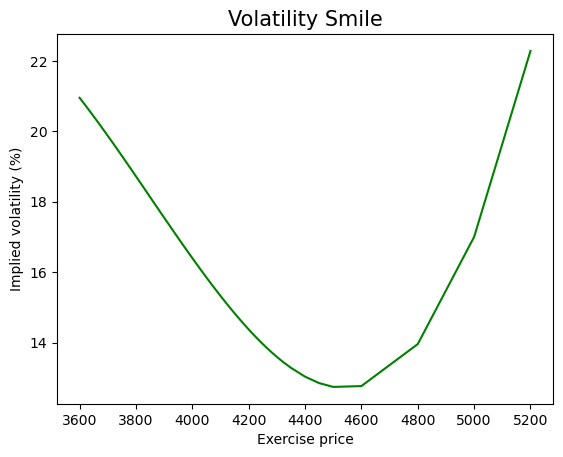

In [183]:
import csv
import matplotlib.pyplot as plt

def bs_eur_estimate_iv(ex_price, int_rate, cur_price, time, option_val,
                       option_type, *, lower_val=0.0001, upper_val=100):
    a = 8.1e-11
    b = -9.35e-7
    c = 0.00348
    d = -3.98
    return a * ex_price**3 + b * ex_price**2 + c * ex_price + d

def apply_iv (in_filename, out_filename, plot_filename = None, *,
              ex_price_field, option_val_field, iv_field, cur_price,
              int_rate, maturity_time, option_type):
    with open(in_filename, newline='') as file:
        header = file.readline()[:-1].split(',')
        try:
            if ex_price_field and option_val_field in header:
                ex_price_field_index = header.index(ex_price_field)
                option_val_field_index = header.index(option_val_field)
        except (ValueError, NameError, TypeError) as exception:
            print(f'{type(exception).__name__}: there are no fields with this names')
        if iv_field not in header:
                header.append(iv_field)
        else: 
            raise NameError('csv field of the implied volatility exists')
        data = [[x for x in line[:-1].split(',')] for line in file]
        for line in data:
            iv_field_data = bs_eur_estimate_iv(ex_price = float(line[ex_price_field_index]), 
                                               int_rate = int_rate, cur_price = cur_price, 
                                               time = maturity_time, option_val = float(line[option_val_field_index]),
                                               option_type = option_type)
            iv_field_data = round(iv_field_data*100, 3)
            line.append(iv_field_data)
        data[:0] = [header]
        print(data)
        
    with open(out_filename, 'w', newline='') as file:
        csv_writer = csv.writer(file)
        for row in data:
            csv_writer.writerow(row)
    if plot_filename != None:
        iv_field_data = []
        ex_price_data = []
        for row in data:
            ex_price_data.append(row[ex_price_field_index])
            iv_field_data.append(row[-1])
        iv_field_data = iv_field_data[1:]
        ex_price_data = [float(x) for x in ex_price_data[1:]]
        plt.plot(ex_price_data, iv_field_data, color = 'g')
        plt.xlabel('Exercise price')
        plt.ylabel('Implied volatility (%)')
        plt.title('Volatility Smile', fontsize = 15)
        plt.savefig(plot_filename)

apply_iv('AMF2_option_sample.csv', 'test_3.csv', 
         'Smile_3.png', ex_price_field = 'Strike', option_val_field = 'Price',
         iv_field = 'Implied_vol', cur_price = 3980, int_rate = 0.0483,
         maturity_time = 35, option_type = 'Call')